In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
HC = pd.read_excel("Arabic_speakers_HC.xlsx")
SC = pd.read_excel("Arabic_speakers_SC.xlsx")

In [2]:
HC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 119 entries, Unnamed: 0 to SCOPE
dtypes: float64(10), int64(109)
memory usage: 51.3 KB


In [3]:
SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 158 entries, Unnamed: 0 to AGEARRIVED
dtypes: float64(126), int64(32)
memory usage: 45.8 KB


HC is all arabic speakers and SC are arabic speakers that were not born in Germany.

This is the list of immigrant IDs [50010214, 50110317, 50180208, 50180216, 50250201, 50390103, 50440104, 50510215, 50720310, 50750403, 51060220, 51110318, 51370209, 51400202, 51420113, 51440317, 51460211, 51460212, 51520103, 51600211, 51720216, 51810312, 51900106, 51910205, 51960204, 51960205, 51960207, 51960210, 51960213, 51960217, 51980107, 52100212, 52250303, 52260303, 52470104, 52510311, 52590107]

Let's do a practice merge. 

I think as these dataframes do not have the same number of rows as SC is only containing data of children not born in Germany - an inner join would work as this would delete the rows of of students not that are not featured in both dataframes. 

In [4]:
df = pd.merge(HC, SC, on='IDSTUD', how='inner')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Columns: 276 entries, Unnamed: 0_x to AGEARRIVED
dtypes: float64(136), int64(140)
memory usage: 80.1 KB


In [7]:
df.columns.to_list()

['Unnamed: 0_x',
 'IDCNTRY_x',
 'IDPOP_x',
 'IDGRADER_x',
 'IDGRADE_x',
 'WAVE_x',
 'IDSCHOOL_x',
 'IDCLASS_x',
 'IDSTUD',
 'ITLANG_HQ',
 'LCID_HQ',
 'ASBH01A',
 'ASBH01B',
 'ASBH01C',
 'ASBH01D',
 'ASBH01E',
 'ASBH01F',
 'ASBH01G',
 'ASBH01H',
 'ASBH01I',
 'ASBH01J',
 'ASBH01K',
 'ASBH01L',
 'ASBH01M',
 'ASBH01N',
 'ASBH01O',
 'ASBH01P',
 'ASBH01Q',
 'ASBH01R',
 'ASBH02A',
 'ASBH02B',
 'ASBH03A',
 'ASBH03B',
 'ASBH03C',
 'ASBH03D',
 'ASBH03E',
 'ASBH03F',
 'ASBH04',
 'ASBH05AA',
 'ASBH05AB',
 'ASBH05B',
 'ASBH06',
 'ASBH07A',
 'ASBH07B',
 'ASBH07C',
 'ASBH07D',
 'ASBH07E',
 'ASBH07F',
 'ASBH07G',
 'ASBH08A',
 'ASBH08B',
 'ASBH08C',
 'ASBH08D',
 'ASBH08E',
 'ASBH08F',
 'ASBH09',
 'ASBH10',
 'ASBH11A',
 'ASBH11B',
 'ASBH11C',
 'ASBH11D',
 'ASBH11E',
 'ASBH11F',
 'ASBH11G',
 'ASBH11H',
 'ASBH12',
 'ASBH13',
 'ASBH14A',
 'ASBH14B',
 'ASBH14C',
 'ASBH15A',
 'ASBH15B',
 'ASBH16',
 'ASBH17A',
 'ASBH17B',
 'ASBH18AA',
 'ASBH18AB',
 'ASBH18BA',
 'ASBH18BB',
 'ASBH18CA',
 'ASBH18CB',
 'ASBH18DA

In [9]:
print(df[["IDSTUD","ASDAGE","ASBH02B"]])

      IDSTUD  ASDAGE  ASBH02B
0   50010214   10.25        1
1   50110317   11.25        2
2   50180208   12.00        4
3   50180216   11.08        3
4   50250201   10.00        2
5   50390103   12.33        4
6   50440104   10.33        2
7   50510215    9.75        9
8   50720310   10.42        3
9   50750403   10.33        4
10  51060220   10.33        2
11  51110318    9.92        2
12  51370209   11.42        2
13  51400202   10.17        3
14  51420113   10.75        2
15  51440317   10.42        2
16  51460211   10.00        2
17  51460212    9.83        2
18  51520103   10.33        2
19  51600211   10.17        2
20  51720216   10.25        3
21  51810312    9.83        2
22  51900106   11.67        3
23  51910205   10.17        1
24  51960204    9.67        2
25  51960205    9.67        2
26  51960207   10.33        3
27  51960210    9.67        2
28  51960213   11.58        3
29  51960217   10.25        2
30  51980107   11.00        2
31  52100212   10.17        2
32  522503

In [13]:
df['MINAGEARRIVAL'] = 0

Let's make a column of min age arrived in Germany, which will be the min age of the column ASBH02B (1: Younger than 3 years old; 2: 3 to 5 years old; 3: 6 to 7 years old; 4: 8 years old or older.) So those with value 1 would have been 0, value 2 would be 3 etc. 

In [14]:
def populate_column(row):
    if row['ASBH02B'] == 1:
        return 0
    elif row['ASBH02B'] == 2:
        return 3
    elif row['ASBH02B'] == 3:
        return 6
    elif row['ASBH02B'] == 4:
        return 8
    else:
        return None  # Or any default value

# Apply the function to each row
df['MINAGEARRIVAL'] = df.apply(populate_column, axis=1)

In [15]:
print(df['MINAGEARRIVAL'])

0     0.0
1     3.0
2     8.0
3     6.0
4     3.0
5     8.0
6     3.0
7     NaN
8     6.0
9     8.0
10    3.0
11    3.0
12    3.0
13    6.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
20    6.0
21    3.0
22    6.0
23    0.0
24    3.0
25    3.0
26    6.0
27    3.0
28    6.0
29    3.0
30    3.0
31    3.0
32    6.0
33    3.0
34    8.0
35    0.0
36    3.0
Name: MINAGEARRIVAL, dtype: float64


In [17]:
print(df[["IDSTUD","ASDAGE","MINAGEARRIVAL"]])

      IDSTUD  ASDAGE  MINAGEARRIVAL
0   50010214   10.25            0.0
1   50110317   11.25            3.0
2   50180208   12.00            8.0
3   50180216   11.08            6.0
4   50250201   10.00            3.0
5   50390103   12.33            8.0
6   50440104   10.33            3.0
7   50510215    9.75            NaN
8   50720310   10.42            6.0
9   50750403   10.33            8.0
10  51060220   10.33            3.0
11  51110318    9.92            3.0
12  51370209   11.42            3.0
13  51400202   10.17            6.0
14  51420113   10.75            3.0
15  51440317   10.42            3.0
16  51460211   10.00            3.0
17  51460212    9.83            3.0
18  51520103   10.33            3.0
19  51600211   10.17            3.0
20  51720216   10.25            6.0
21  51810312    9.83            3.0
22  51900106   11.67            6.0
23  51910205   10.17            0.0
24  51960204    9.67            3.0
25  51960205    9.67            3.0
26  51960207   10.33        

In [18]:
# Calculate correlation between two columns
correlation = df['ASDAGE'].corr(df['MINAGEARRIVAL'])
print(correlation)

0.5122474047888823


So there is a moderate correlation between these two columns - which is what I would expect. Meaning if the children arrive in Germany at an older age there is more likelihood that they will be older than their classmates. 

Let's visualise this with a scatter plot. 

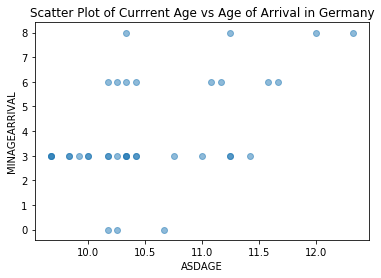

In [19]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['ASDAGE'], df['MINAGEARRIVAL'], alpha=0.5)  # Alpha controls the transparency of points

# Add labels and title
plt.xlabel('ASDAGE')
plt.ylabel('MINAGEARRIVAL')
plt.title('Scatter Plot of Currrent Age vs Age of Arrival in Germany')

# Display the plot
plt.show()

This was actually quite useful. As we only have a small number of students we can see each indiviudal student on the graph. There are two students who are aged 12 and arrived relatively recently in Germany. However, two recent arrivals are the same age as the rest of the class. It would be better however to do this correlation with the whole dataset (including children who are not Arabic speakers and who were born in Germany, with different colours showing these different groups). 

Now let's do a groupby by age to understand more about the older students compared to their peers. 

In [24]:
df.groupby("ASDAGE")["MINAGEARRIVAL"].mean()

ASDAGE
9.67     3.000000
9.75          NaN
9.83     3.000000
9.92     3.000000
10.00    3.000000
10.17    3.000000
10.25    3.000000
10.33    4.600000
10.42    4.000000
10.67    0.000000
10.75    3.000000
11.00    3.000000
11.08    6.000000
11.17    6.000000
11.25    4.666667
11.42    3.000000
11.58    6.000000
11.67    6.000000
12.00    8.000000
12.33    8.000000
Name: MINAGEARRIVAL, dtype: float64

I need to round the ages up so that they become categories. (9,10,11,12) etc.

In [25]:
# Round ages to the nearest integer
df['rounded_ages'] = df['ASDAGE'].round()

# Group by rounded ages and perform aggregation
grouped_data = df.groupby('rounded_ages').agg({'MINAGEARRIVAL': 'mean'})

# Reset index to make 'rounded_ages' a regular column
grouped_data = grouped_data.reset_index()

# Print or further process grouped data
print(grouped_data)

   rounded_ages  MINAGEARRIVAL
0          10.0       3.478261
1          11.0       3.888889
2          12.0       7.000000


That's pretty interesting. As this is not causation we should also look at this the other way round, I think. 

In [26]:
# Group by rounded ages and perform aggregation
grouped_by_agearrival = df.groupby('MINAGEARRIVAL').agg({'ASDAGE': 'mean'})

# Print or further process grouped data
print(grouped_by_agearrival)

                  ASDAGE
MINAGEARRIVAL           
0.0            10.363333
3.0            10.318095
6.0            10.833750
8.0            11.477500


I think want to group by age of arrival - I think that will yield interesting comparisons. 

In [27]:
mean_of_belonging = df.groupby('MINAGEARRIVAL').agg({'ASBG10C': 'mean'})
print(mean_of_belonging)

                ASBG10C
MINAGEARRIVAL          
0.0            1.000000
3.0            2.055556
6.0            1.625000
8.0            1.500000


In [28]:
mean_of_ASBG10D = df.groupby('MINAGEARRIVAL').agg({'ASBG10D': 'mean'})
print(mean_of_ASBG10D)

               ASBG10D
MINAGEARRIVAL         
0.0              3.000
3.0              2.000
6.0              2.875
8.0              1.250


In [29]:
mean_of_ASBG11A = df.groupby('MINAGEARRIVAL').agg({'ASBG11A': 'mean'})
print(mean_of_ASBG11A)

                ASBG11A
MINAGEARRIVAL          
0.0            1.500000
3.0            2.722222
6.0            3.250000
8.0            2.750000


In [39]:
mean_of_ASBG11A = df.groupby('MINAGEARRIVAL').agg({'ASRREA01': 'mean'})
print(mean_of_ASBG11A)

                 ASRREA01
MINAGEARRIVAL            
0.0            468.457240
3.0            470.774879
6.0            473.997219
8.0            458.578480


Based on this one level of comprehension (ASRREA01), there does seem to be a reduced level of comprehension for the children that have arrived at a older age in Germany. But not by a lot. It would be interesting to sum all the comprehensions and get a score for that.

So what I want to do is add new columns which are the mean of the reading and lit scores etc. for each child. 

In [40]:
df[['READING', 'LITPURPOSE', 'INFORMATIONPURPOSE','INTERPRETING','STRAIGHTFORWARDPROCESS']] = 0

In [41]:
column_location = df.columns.get_loc('ASRREA01')

In [42]:
print(column_location)

224


In [43]:
df['READING'] = df.iloc[:, 224:228].mean(axis=1)

In [44]:
print(df['READING'])

0     577.138923
1     452.542425
2     420.842782
3     454.598360
4     447.010058
5     538.001820
6     423.408785
7     433.934038
8     402.836423
9     456.197515
10    444.663462
11    599.028897
12    557.190960
13    414.011510
14    318.563860
15    475.901763
16    441.995052
17    416.214587
18    564.971480
19    515.122817
20    589.231092
21    487.569993
22    455.731060
23    376.586230
24    548.384817
25    502.332103
26    523.436978
27    450.272837
28    459.512355
29    409.586383
30    473.728673
31    489.372520
32    492.739300
33    395.918005
34    431.346985
35    399.595235
36    441.416990
Name: READING, dtype: float64


In [45]:
selected_columns = df.columns[224:249]

# Print the selected column names
print(selected_columns)

Index(['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01',
       'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02',
       'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03',
       'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04',
       'ASRRSI05'],
      dtype='object')


In [36]:
pivot_df = df.pivot_table(values='ASRREA01', index='MINAGEARRIVAL', columns=['ASBG10C'], aggfunc='mean')

In [37]:
pivot_df

ASBG10C,1.0,2.0,3.0,9.0
MINAGEARRIVAL,,,,
0.0,488.734350,NaN,NaN,NaN
3.0,450.431912,461.96412,480.270687,576.27138
6.0,496.508582,410.73690,449.348970,NaN
8.0,462.482907,NaN,446.865200,NaN


Should I do the comparison with Turkey quite soon? Like now?

In [ ]:
## This is how you set the criteria for a new column, A is the new column
df.loc[(df['B'] > 20) & (df['C'] == 'X'), 'A'] *= 2